In [1]:
#importing library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

In [24]:
#get values from csv file
train = pd.read_csv('train.csv')
submission = pd.read_csv('test.csv')
#train.shape

(42000, 785)

In [26]:
y_train = train['label'] # take label row from train data for output
X_train = train.drop('label', axis=1) # drop label fron input values
X_submission = submission # test datas

(28000, 784)

In [4]:
#get top five values from output values
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
#get top five values from input values
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#get top five values from input test values
X_submission.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.decomposition import PCA
#do pca and fit input data in pca with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

[0.09748938 0.07160266]


In [8]:
print(X_train.shape)
print(pca_result.shape)

(42000, 784)
(42000, 2)


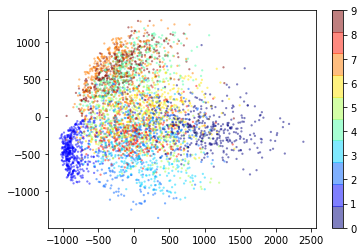

In [9]:
#draw values on scatter plot
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

Text(0, 0.5, 'Cumulative explained variance')

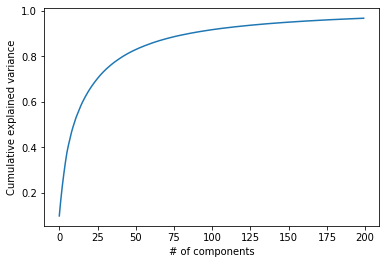

In [10]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

In [11]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_submission_transformed = pca.transform(X_submission)

In [12]:
from sklearn.model_selection import train_test_split
#separate train and test data with size 
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2, random_state=13)

In [13]:
#components values and neighbors 
components = [5, 10, 15]
neighbors = [1, 2, 3, 4, 5, 6, 7]

#create an empty matrix and then give data from components and neighbors 
scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#find score with knn 
#trying knn with clustering (random cluster setting)
for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)

Components =  5 , neighbors =  1 , Score =  0.6834523809523809
Components =  5 , neighbors =  2 , Score =  0.670952380952381
Components =  5 , neighbors =  3 , Score =  0.7113095238095238
Components =  5 , neighbors =  4 , Score =  0.7233333333333334
Components =  5 , neighbors =  5 , Score =  0.7301190476190477
Components =  5 , neighbors =  6 , Score =  0.7353571428571428
Components =  5 , neighbors =  7 , Score =  0.7394047619047619
Components =  10 , neighbors =  1 , Score =  0.9104761904761904
Components =  10 , neighbors =  2 , Score =  0.905952380952381
Components =  10 , neighbors =  3 , Score =  0.92
Components =  10 , neighbors =  4 , Score =  0.9213095238095238
Components =  10 , neighbors =  5 , Score =  0.9226190476190477
Components =  10 , neighbors =  6 , Score =  0.9220238095238096
Components =  10 , neighbors =  7 , Score =  0.9205952380952381
Components =  15 , neighbors =  1 , Score =  0.9461904761904761
Components =  15 , neighbors =  2 , Score =  0.9423809523809524

In [15]:
#cluster setting with K-means by cross validation 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ("kmeans", KMeans(n_clusters=50)),
 ("knn", knn),
])
pipeline.fit(X_train_pca, y_train_pca)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [16]:
#here is score
pipeline.score(X_train_pca, y_train_pca)

0.9580357142857143

In [20]:
#classification
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(60,61))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train_pca, y_train_pca)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] kmeans__n_clusters=60 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=60, total=  32.5s
[CV] kmeans__n_clusters=60 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.4s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=60, total=  37.4s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=  34.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
  

In [21]:
#after fitting take best params
grid_clf.best_params_ 

{'kmeans__n_clusters': 60}

In [22]:
#here is score
grid_clf.score(X_train_pca, y_train_pca)

0.9601190476190476